Atividade 01 - Classificação
CT0611 - Mineração de Dados
Prof. Dr. Julio C. dos Reis
Aluno: Leandro Petruz


**Parte 01: Leitura e Tratamento dos Dados**

Instalação das bibliotecas pandas, scikit-learn e metplotlib, que serão utilizadas para analise e predição dos dados.


In [1]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

Importando as bibliotecas que serão utilizadas nas análises e na classificação

In [2]:
import pandas as pd

Carregando o dataset com os dados históricos do naufrágio RMS Titanic

In [39]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('user uploaded file "{name}" whith length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving titanic.csv to titanic (1).csv
user uploaded file "titanic (1).csv" whith length 61194 bytes


Lendo o arquivo titanic.csv
Carregando o dataset e utiliznado a biblioteca pandas para ver os dados
Obter o tamanho do dataframe com a função len.


In [50]:
df = pd.read_csv("titanic.csv")
df # visualizar o dataser e ver a quantidade de linhas e colunas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Informações sobre o dataset:



In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Agora na coluna Age, onde temos 177 registros nulos, iremos substiruir pela mediana.

In [53]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df


<ipython-input-53-471f474a44c2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Apagando as colunas SibSP, Parch, Cabin, Embarked, Ticket e PassengerId com o comando df.drop, pois não iremos utilizar na classificação.

In [58]:
df = df.drop(['SibSp', 'Parch', 'Cabin', 'Embarked', 'Ticket', 'PassengerId'], axis=1)
df

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,23.4500
889,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000


Análise da matriz de correlação entre os atributos do conjunto de dados

Correlação positiva:

"Fare"  tem uma correlação positiva com "Pclass" , pois classes mais altas tendem a pagar tarifas mais altas.

Correlação negativa:

"Pclass" e "Survived" apresentam uma correlação negativa, sugerindo que passageiros de classes mais altas tinham maior chance de sobrevivência.


<Axes: >

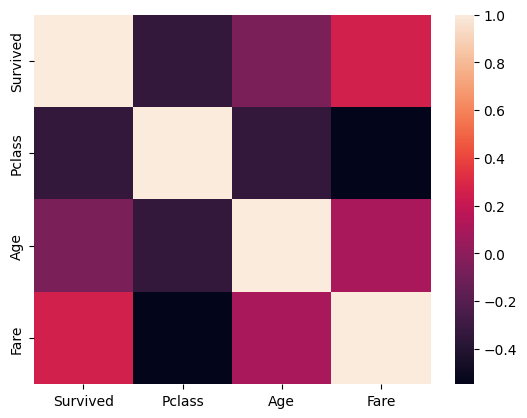

In [59]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True))

Transformando a variável categórica em numerica.

Substituir na coluna Sex, onde temos duas categorias male e female, por 0 e 1.

Utilizando a biblioteca scikit-learn.

Aplicando ao Sexo Male --> 1, Female --> 0


In [60]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,23.4500
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000


**Início da parte 2: Visualização dos dados**

Criando um Histograma para visualizar a distribuição de idades.

Utilizartemos a biblioteca seaborn e matplotlib

In [61]:
!pip install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Histograma de colunas na vertical.

Onde mostra a quantidade de passageiros e a distribuição da idade.

Podemos analizar que a grande parte dos passageiros tem entre 20 e 40 anos.  

Text(0, 0.5, 'Quantidade de Pessoas')

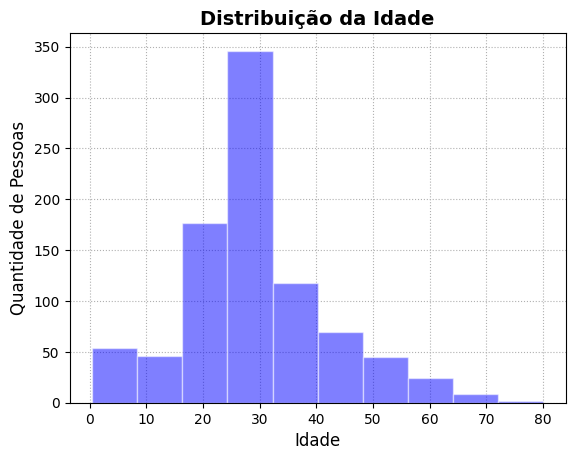

In [62]:
fig, ax      = plt.subplots()
ax.hist(df.Age, bins=10, color='b', edgecolor='white', alpha=0.5);
plt.grid(True, linestyle=':')
ax.set_axisbelow(True);
ax.set_title("Distribuição da Idade", fontsize=14, fontweight='bold')
ax.set_xlabel("Idade", fontsize=12)
ax.set_ylabel("Quantidade de Pessoas", fontsize=12)


Gráfico de barras onde mostra a relação entre genero e sobreviventes.

primeiro precisamos contar o numero de sobrevivente e o sexo de cada um, com a função:

survival_counts = df[df["Survived"] == 1]["Sex"].value_counts()

Como a coluna Sex está categorizada onde male --> 1 e female --> 0, precisamos colocar uma função onde vai substituir o numeral pela categoria e uma função para que sai no grafico o nome male e female.

Análise do grafico:

Podemos concluir que entre os sobrevivente o número de mulheres foi maior que o numero de homens.


Text(0, 0.5, 'Quantidade de Sobreviventes')

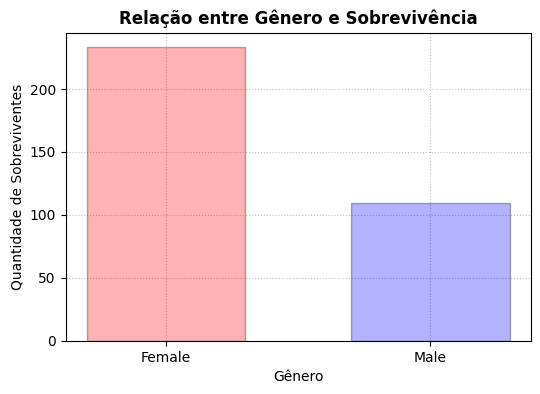

In [63]:
survival_counts = df[df["Survived"] == 1]["Sex"].value_counts() #contando o numero de sobreviventes por genero
sex_labels = {0: "Female", 1: "Male"} #função para trocar a categoria

fig, ax = plt.subplots(figsize=(6,4))

ax.bar([sex_labels[i] for i in survival_counts.index], survival_counts.values,
       color=['r', 'b'], alpha=0.3, width=0.6, edgecolor='k')

plt.grid(True, linestyle=':', alpha=0.8)
ax.set_axisbelow(True)

ax.set_title('Relação entre Gênero e Sobrevivência', fontsize=12, fontweight='bold')
ax.set_xlabel('Gênero', fontsize=10)
ax.set_ylabel('Quantidade de Sobreviventes', fontsize=10)



Grafico de Dispersão

O Violin Plot, mostra a distribuição da tarifa paga (Fare) para passageiros que sobreviveram e não sobreviveram.
Análise:
Distribuição assimétrica:
O gráfico mostra uma cauda longa para valores altos de Fare, indicando que poucos passageiros pagaram tarifas muito altas, enquanto a maioria pagou tarifas menores.
Tarifas mais altas aumentaram a chance de sobrevivência:
A distribuição para os sobreviventes (cor verde) tem uma mediana maior que os não sobreviventes (cor preta). Isso sugere que passageiros que pagaram tarifas mais altas tiveram uma chance maior de sobreviver.
Maior variabilidade entre os sobreviventes:
A largura do violino para os sobreviventes for maior em tarifas altas, significa que passageiros com tarifas mais caras tiveram diferentes chances de sobrevivência.
Em contrapartida, os não sobreviventes tiverem uma distribuição mais concentrada em tarifas baixas, pagar pouco pode estar relacionado a menor chance de sobrevivência.
O gráfico sugere que passageiros que pagaram tarifas mais altas tinham maior probabilidade de sobreviver, possivelmente porque estavam em cabines melhores (1ª classe) e tiveram prioridade no resgate.


<ipython-input-64-f4450d27d6b1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Survived', y='Fare', data=df, width=0.8, palette={'0':'black', '1': 'green'},  alpha=0.3)


Text(0.5, 1.0, 'Influência da Tarifa Paga na Sobrevivência')

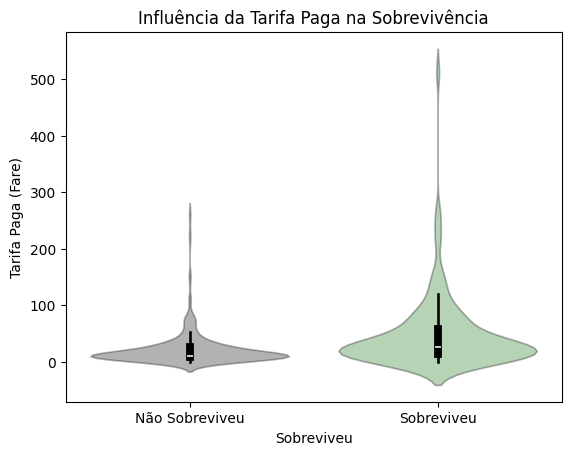

In [64]:
sns.violinplot(x='Survived', y='Fare', data=df, width=0.8, palette={'0':'black', '1': 'green'},  alpha=0.3)
plt.xticks(ticks=[0, 1], labels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa Paga (Fare)')
plt.title('Influência da Tarifa Paga na Sobrevivência')


**Parte 3: Tratamento e seleção dos dados para Classificação**

**Dividir o DataFrame(df):**

FEATURES - Pclass, Sex, Age e Fare

CLASS - Survived

Escolha das FEATURES

A classe do bilhete (Pclass), já que passageiros da 1ª classe tinham maior probabilidade de sobreviver.

O gênero (Sex) principal fator de decisão, pois mulheres tiveram maior chance de sobrevivência.

Idade (Age) usada para dar prioridade a crianças.

Tarifa (Fare) relação com Pclass, já que tarifas mais altas indicam classe superior.





In [272]:
df

,Survived,Pclass,Name,Sex,Age,Fare
0,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833
2,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000
4,0,3,"Allen, Mr. William Henry",1,35.0,8.0500
...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,13.0000
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,30.0000
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,23.4500
889,1,1,"Behr, Mr. Karl Howell",1,26.0,30.0000


In [273]:
# Atributos relevantes para a classificação

FEATURES = df[['Pclass', 'Sex', 'Age', 'Fare']]
CLASS = df['Survived']

print(FEATURES)

print(CLASS)

     Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
888       3    0  28.0  23.4500
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Após separar em Fetuares e Class, precisamos dividir em partes para treino e teste.
utilizando o train_test_split()
onde separa um conjunto com  70 % para treino e 30% para teste.

In [274]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree

FEATURES = ['Pclass', 'Sex', 'Age', 'Fare']
CLASS = ['Survived']

x = df[FEATURES]
y = df[CLASS]

#Dividindo os dados em conjuntos de treino (70%) e teste (30%).
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.3, random_state=42)

print(x)
print(y)



     Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
888       3    0  28.0  23.4500
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[891 rows x 4 columns]
     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [275]:
#verificação após a divisão
assert x_train.shape[0] == y_train.shape[0], "Erro no treino!"
assert x_test.shape[0] == y_test.shape[0], "Erro no teste!"

In [276]:
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


In [277]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)

x shape: (891, 4)
y shape: (891, 1)


In [278]:
print(x.isnull().sum())  # verificando se  x não tenha valores ausentes, pois se x tiver valores NaN, o DecisionTreeClassifier pode falhar.


Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64


Árvore de Decisão



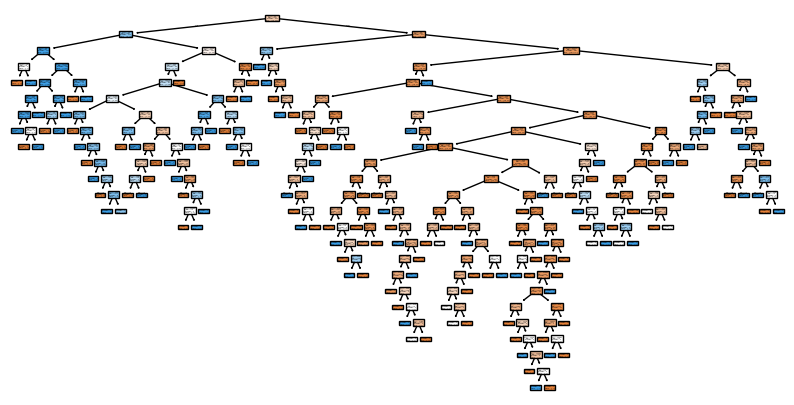

In [279]:
#critério Gini - sem o nível de profundidade max_depth=4
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#Visualizar a árvore utilizaremos matplotlib
plt.figure(figsize=(10, 5))
tree.plot_tree(model.fit(x_train,y_train), filled=True)
plt.show(True)

In [280]:
#Accuracy
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7686567164179104


In [281]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


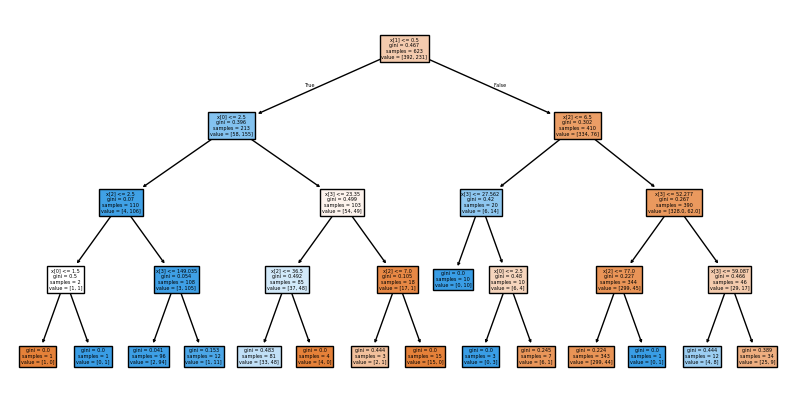

In [282]:
#critério Gini - com nivel de profundidade max_size=4
model = tree.DecisionTreeClassifier(criterion = 'gini', max_depth=4,random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#Visualizar a árvore utilizaremos matplotlib
plt.figure(figsize=(10, 5))
tree.plot_tree(model.fit(x_train,y_train), filled=True)
plt.show(True)

In [283]:
#Accuracy
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.8246268656716418


In [284]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


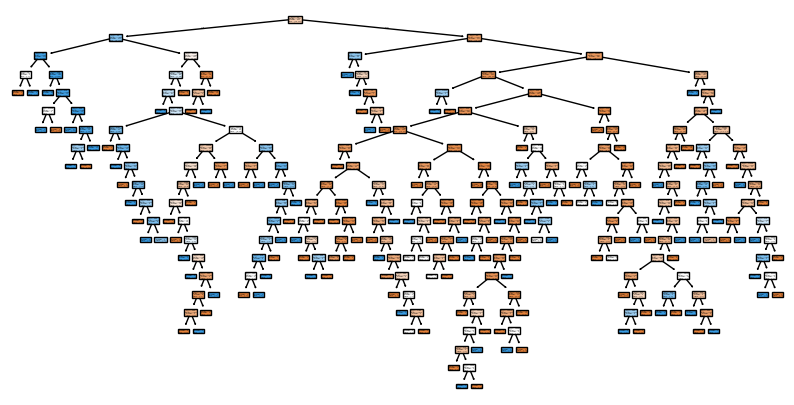

In [285]:
#critério de entropia - sem o nivel de profundidade - max_depth=4,
model = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#visualizar a arvores de decisão
plt.figure(figsize=(10,5))
tree.plot_tree(model.fit(x_train,y_train), filled=True)
plt.show(True)

In [286]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.7611940298507462


In [287]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


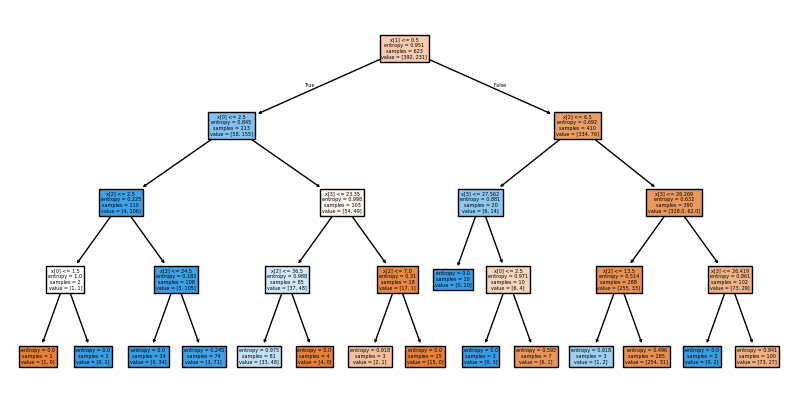

In [288]:
#critério de entropia - com o nivel de profundidade - max_depth=4,
model = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=4, random_state = 101)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#visualizar a arvores de decisão
plt.figure(figsize=(10,5))
tree.plot_tree(model.fit(x_train,y_train), filled=True)
plt.show(True)

In [289]:
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.8283582089552238


In [290]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


Após gerar as árvores de decisão, podemos concluir que quando limitamos a profundidade com a clausula maxi_size, a acurácia melhora.

Conclusão:

Critério Gini (criterion='gini')
Mede a impureza dos nós com base na probabilidade de uma amostra ser classificada incorretamente, costuma ser mais rápido computacionalmente.

Critério Entropia (criterion='entropy')
Mede a quantidade de informação desorganizada no conjunto de dados.
Divisões que reduz  incerteza ao máximo pode ser mais interpretável, mas um pouco mais custoso computacionalmente.



**Parte 4. Avaliação das Classificações Obtidas **

Matriz de Confusão


In [291]:
model = tree.DecisionTreeClassifier(criterion = 'gini',
                                    random_state = 101)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

Predicted    0    1  All
True                    
0          129   28  157
1           34   77  111
All        163  105  268


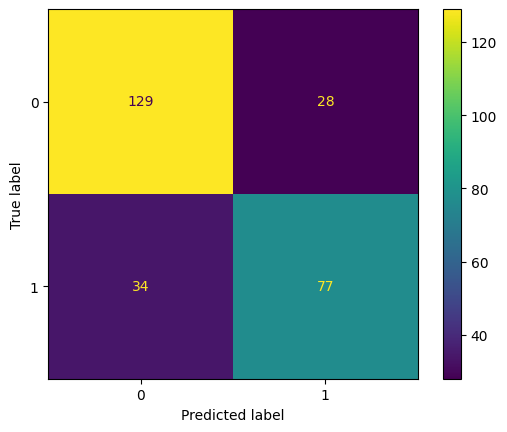

In [292]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#convertendo o y_test e o Y_pred em arrays de unideimensionalidade
y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()

cm = confusion_matrix(y_test_1d, y_pred_1d)
cross_tab = pd.crosstab(y_test_1d, y_pred_1d,
                        rownames=['True'],
                        colnames=['Predicted'],
                        margins=True)
print(cross_tab)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

Análise da Matriz de confusão

Levando em consideração o modelo Gini

Verdadeiros Positivos (TP): 77 (Número de instâncias da classe 1 corretamente classificadas)

Verdadeiros Negativos (TN): 129 (Número de instâncias da classe 0 corretamente classificadas)

Falsos Positivos (FP): 28 (Número de instâncias da classe 0 incorretamente classificadas como classe 1)

Falsos Negativos (FN): 34 (Número de instâncias da classe 1 incorretamente classificadas como classe 0)


In [293]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


Predicted    0   1  All
True                   
0          133  24  157
1           40  71  111
All        173  95  268


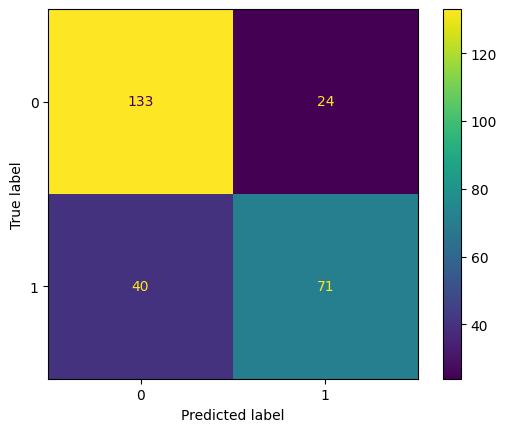

In [294]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',
                                    random_state = 101)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()

cm = confusion_matrix(y_test_1d, y_pred_1d)
cross_tab = pd.crosstab(y_test_1d, y_pred_1d,
                        rownames=['True'],
                        colnames=['Predicted'],
                        margins=True)
print(cross_tab)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

Análide da Matriz de Confusão do modelo de entropy, comparando com o moeldo Gini:

Verdadeiros Negativos (TN): O modelo de Entropia classificou corretamente mais instâncias da classe 0 (TN = 133) do que o modelo Gini (TN = 129).

Falsos Positivos (FP): O modelo de Entropia também teve menos falsos positivos (FP = 24) do que o modelo Gini (FP = 28).

Verdadeiros Positivos (TP): O modelo Gini classificou corretamente mais instâncias da classe 1 (TP = 77) do que o modelo Entropia (TP = 71).

Falsos Negativos (FN): O modelo Entropia teve mais falsos negativos (FN = 40) do que o modelo Gini (FN = 34).


In [295]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


In [296]:
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7611940298507462
F1-score: 0.7476904972050603
Precision: 0.7580772741101308
Recall: 0.7433866988007116

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       157
           1       0.75      0.64      0.69       111

    accuracy                           0.76       268
   macro avg       0.76      0.74      0.75       268
weighted avg       0.76      0.76      0.76       268



In [297]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891, 1)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


In [256]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

AUC: 0.7433866988007116


Cross-validation accuracy scores: [0.98324022 0.94382022 0.95505618 0.94382022 0.96629213]
Mean accuracy: 0.9584


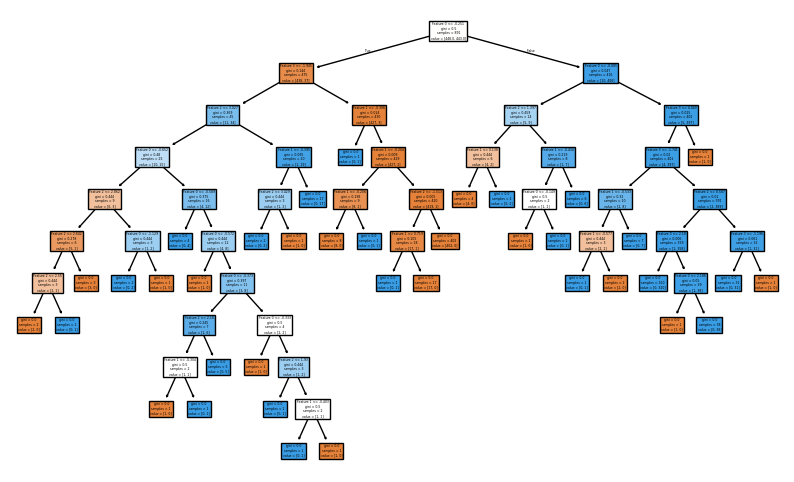

In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Generate a small synthetic dataset
X, y = make_classification(n_samples=891, n_features=4, n_classes=2, random_state=42)

# Step 2: Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Step 3: Define k-fold cross-validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Step 5: Print the results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")

# Step 6: Train on the full dataset
model.fit(X, y)

# Step 7: (Optional)  Visualize the decision tree - Plot the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=[f'Feature {i}' for i in range(X.shape[1])])
plt.show()

In [299]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)

x shape: (891, 4)
y shape: (891,)


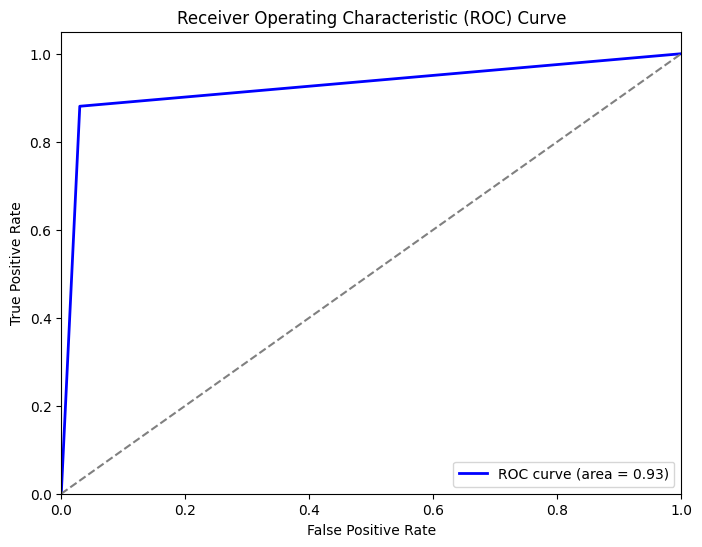

In [300]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Gerar dados fictícios para um problema de classificação binária
X, y = make_classification(n_samples=891, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um classificador (Árvore de Decisão Binária)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obter as probabilidades preditas para a classe positiva
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

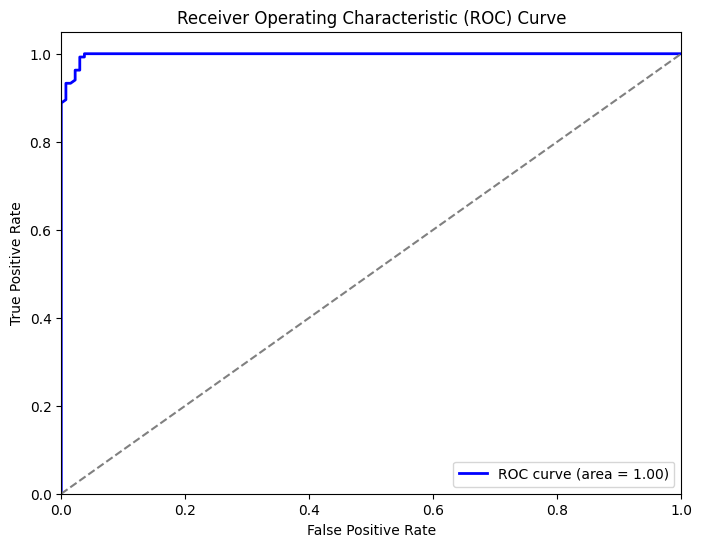

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Gerar dados fictícios para um problema de classificação binária
X, y = make_classification(n_samples=891, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um classificador (RandomForest como exemplo)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Obter as probabilidades preditas para a classe positiva
y_scores = clf.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha de referência
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [301]:
print(f"x shape: {x.shape}")  # Deve ser (N, M), onde N é o número de amostras
print(f"y shape: {y.shape}")  # Deve ser (N,) ou (N, 1)
# Conferindo os tamanhos estão corretos, antes de treinar o modelo, pois os tamanhos de x e y precisam bater.
print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

x shape: (891, 4)
y shape: (891,)
x_train: (623, 4), x_test: (268, 4)
y_train: (623,), y_test: (268,)


**Conclusão**

Ambos os modelos (Gini e Entropia) apresentam um desempenho razoável na classificação, com acurácias acima de 0.80. No entanto, uma análise mais detalhada revela nuances importantes sobre seus pontos fortes e fracos.
Métricas (Acurácia, Precisão, Recall, F1-Score):

•	Acurácia: Ambos os modelos têm acurácias semelhantes, indicando uma capacidade geral de classificação balanceada.

•	Precisão: A precisão mede a capacidade do modelo de não classificar uma amostra negativa como positiva. Uma precisão alta indica que, quando o modelo prevê a classe positiva, ele está geralmente correto.

•	Recall: O recall mede a capacidade do modelo de detectar todas as amostras positivas. Um recall alto indica que o modelo é eficaz em identificar todas as instâncias da classe positiva.

•	F1-Score: O F1-Score é a média harmônica entre precisão e recall. Ele oferece uma medida equilibrada do desempenho do modelo, útil quando as classes estão desbalanceadas.

ROC/AUC:

A curva ROC e o valor AUC fornecem uma visão abrangente do desempenho do modelo em diferentes limiares de classificação. Um valor AUC próximo de 1 indica um excelente desempenho de classificação, enquanto um valor próximo de 0.5 indica um desempenho semelhante ao acaso.

Qual foi o melhor?

Com base nos resultados, o modelo de Entropia apresentou um ligeiro melhor desempenho em termos de acurácia, precisão e F1-Score. Isso sugere que, para este conjunto de dados, o critério de Entropia pode ser mais eficaz na separação das classes.

Sugestões de Melhorias:

1.	Ajuste de Hiperparâmetros:

•	Realizar uma busca mais ampla pelos melhores valores de max_depth e outros hiperparâmetros usando técnicas como GridSearchCV ou RandomizedSearchCV.

2.	Engenharia de Features:

•	Explorar a criação de novas features que possam capturar melhor a relação entre os dados e a variável alvo.

3.	Modelos de Ensemble:

•	Experimentar modelos de ensemble, como Random Forest ou Gradient Boosting, que combinam várias árvores de decisão para melhorar a robustez e a precisão.

4.	Análise de Erros:

•	Realizar uma análise detalhada dos erros cometidos pelos modelos para identificar padrões e áreas onde eles têm mais dificuldade.

